# CIFAR 100 dataset - Image recognition 

## Submitted by: Group 7

Source:  http://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR datasets are labeled subsets of the 80 million tiny images dataset
collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The images are of size 32x32 pixels with 3 color channels (RGB).It comprises of 100 classes containing 600 images each (500 training and 100 testing).

The classes (fine labels) are grouped into 20 superclasses (coarse labels) and corresponding classes. Group 7 has chosen the below subset of the data.

### Medium-sized mammals -
fox, porcupine, possum, raccoon, skunk

### Small mammals -
hamster, mouse, rabbit, shrew, squirrel


## Data Preparation (Megha / Dandan)

In [0]:
# Install keras and dill
!pip install dill
!pip install -q keras

In [0]:
# Import packages and modules
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
# Set tensorflow in the backend
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [0]:
# Smaller batch size means more updates in one epoch
batch_size = 256
num_classes = 100
'''
epochs_longrun = 500
save_dir = "/work"
res_dir = "/results"
model_name = 'convnet_cifar100'
'''

'\nepochs_longrun = 500\nsave_dir = "/work"\nres_dir = "/results"\nmodel_name = \'convnet_cifar100\'\n'

In [0]:
# Load data and set a seed for reproducibility of results
tf.reset_default_graph()
tf.set_random_seed(343)
np.random.seed(343)

# The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()   # point!!!!
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169009152/169001437 [==============================] - 9s 0us/step
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [0]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

### Combine the training and test data back into one data

In [0]:
# Use concatenate function to merge the two sets
#We need to concatenate the input to separate it again following our M2 rules
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test)) 

print('x shape:', x.shape)
print('multiple y shape:', y.shape)

x shape: (60000, 3, 32, 32)
multiple y shape: (60000, 1)


In [0]:
# Check the unique values in training set / target is hundred classes

unique, counts = np.unique(y, return_counts=True)  #Numpyway to count the number of time a certain number occurs
unique
#dict(zip(unique, counts)) #builds a dictionary that shows that count

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Filter out the assigned superclasses

In [0]:
# First and foremost, define fine labels
fine_label = [
'apple',                                         # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

# For the above fine labels, find the index of relevant sub-classes
medium_sized_mammals_index = [ fine_label.index(x) for x in ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'] ]
small_mammals_index = [ fine_label.index(x) for x in ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'] ]
target_index = medium_sized_mammals_index + small_mammals_index

print ("Index of Medium-sized mammals:", medium_sized_mammals_index,"\nIndex of Small mammals:", small_mammals_index)

Index of Medium-sized mammals: [34, 63, 64, 66, 75] 
Index of Small mammals: [36, 50, 65, 74, 80]


In [0]:
# For training set
medium_index2 = [ fine_label.index(x) for x in ['porcupine', 'possum', 'raccoon', 'skunk'] ]
small_index2 = [ fine_label.index(x) for x in ['hamster', 'mouse', 'rabbit', 'shrew'] ]
target_index2 = medium_index2 + small_index2

print ("Training set-\nNew index of Medium-sized mammals:", medium_index2,"\nNew index of Small mammals:", small_index2)

# For testing data - 
medium_index_2 = [ fine_label.index(x) for x in ['fox'] ]
small_index_2 = [ fine_label.index(x) for x in ['squirrel'] ]
target_index_2 = medium_index_2 + small_index_2

print ("\nTesting set-\nNew index of Medium-sized mammals:", medium_index_2,"\nNew index of Small mammals:", small_index_2)

Training set-
New index of Medium-sized mammals: [63, 64, 66, 75] 
New index of Small mammals: [36, 50, 65, 74]

Testing set-
New index of Medium-sized mammals: [34] 
New index of Small mammals: [80]


In [0]:
# Splice the dataset to extract the relevant portion of data
train_slice2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index2])
y_train2 = y[train_slice2]
x_train2 = x[train_slice2]

# Test set
test_slice2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index_2])
y_test2 = y[test_slice2]
x_test2 = x[test_slice2]

print ("Training set:", np.unique(y_train2))
print ("Testing set:", np.unique(y_test2))


print('\ny_train2 shape:', y_train2.shape)
print('y_test2 shape:', y_test2.shape)

unique, counts = np.unique(y_test2, return_counts=True)  #Numpyway to count the number of time a certain number occurs
dict(zip(unique, counts)) #builds a dictionary that shows that count


Training set: [36 50 63 64 65 66 74 75]
Testing set: [34 80]

y_train2 shape: (4800, 1)
y_test2 shape: (1200, 1)


{34: 600, 80: 600}

In [0]:
# Convert class vectors to binary class matrices.
y_train_c = to_categorical(y_train2, num_classes)
y_test_c = to_categorical(y_test2, num_classes)


#Normalize data
x_train = x_train2.astype('float32')
x_test = x_test2.astype('float32')
x_train /= 255.0    
x_test /= 255.0

In [0]:
#  Binary as we are working with two superclasses labels (or coarse labels)
y_train_bin = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_train2 ])
y_test_bin = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_test2 ])

print('binary y train shape:', y_train_bin.shape)
print('binary y test shape:', y_test_bin.shape)

print('')
unique, counts = np.unique(y_train_bin, return_counts=True)  #Numpyway to count the number of time a certain number occurs
unique
dict(zip(unique, counts)) #builds a dictionary that shows that count


binary y train shape: (4800, 1)
binary y test shape: (1200, 1)



{0: 2400, 1: 2400}

### Visualize and validate the data 

In [0]:
# Assign a binary class
y_class=[[0] if i in [34,63,64,66,75] else [1] for i in y]

# Slice for individual classes
slice1=np.array([ idx for idx, y in enumerate(y) if y[0] in [34]])
slice2=np.array([ idx for idx, y in enumerate(y) if y[0] in [63]])
slice3=np.array([ idx for idx, y in enumerate(y) if y[0] in [64]])
slice4=np.array([ idx for idx, y in enumerate(y) if y[0] in [66]])
slice5=np.array([ idx for idx, y in enumerate(y) if y[0] in [75]])
slice6=np.array([ idx for idx, y in enumerate(y) if y[0] in [36]])
slice7=np.array([ idx for idx, y in enumerate(y) if y[0] in [50]])
slice8=np.array([ idx for idx, y in enumerate(y) if y[0] in [65]])
slice9=np.array([ idx for idx, y in enumerate(y) if y[0] in [74]])
slice10=np.array([ idx for idx, y in enumerate(y) if y[0] in [80]])

x1 =x[slice1]; y1=y[slice1]
x2 =x[slice2]; y2=y[slice2]
x3 =x[slice3]; y3=y[slice3]
x4 =x[slice4]; y4=y[slice4]
x5 =x[slice5]; y5=y[slice5]
x6 =x[slice6]; y6=y[slice6]
x7 =x[slice7]; y7=y[slice7]
x8 =x[slice8]; y8=y[slice8]
x9 =x[slice9]; y9=y[slice9]
x10 =x[slice10]; y10=y[slice10]

In [0]:
# Define function for visualization
def cifar_grid0(X,Y,index1,inds,n_col):#print out randomly selected images and their labels
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(10, 10))
  
# align labels in the right order, i.e., from 0 to 9
  clabels = {34: 'Fox', 63: 'Porcupine', 64: 'Possum', 66: 'Raccoon', 75: 'Skunk', 36: 'Hamster', 50: 'Mouse', 65: 'Rabbit', 74: 'Shrew', 80: 'Squirrel'}
  y_class_name=["Medium-sized mammal" if i in [34,63,64,66,75] else "Small mammal" for i in Y]
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        label =clabels[Y[i_data][0]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1, xticks=[], yticks=[])
        plt.imshow(img)
        plt.title("{}\n- {}".format(y_class_name[index1],label))
       
         
  fig.set_tight_layout(True)

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


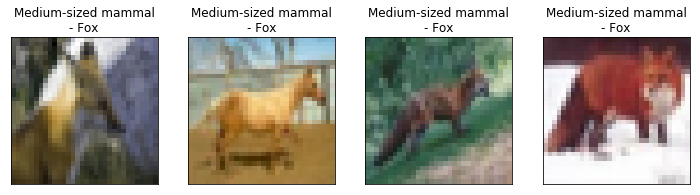

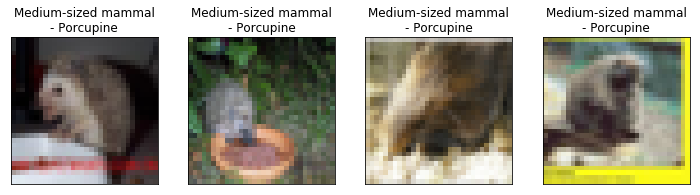

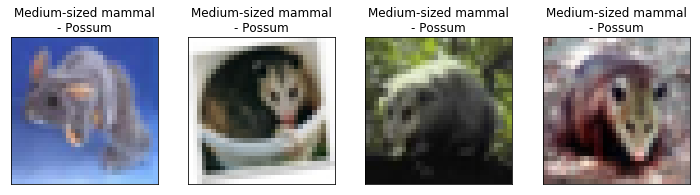

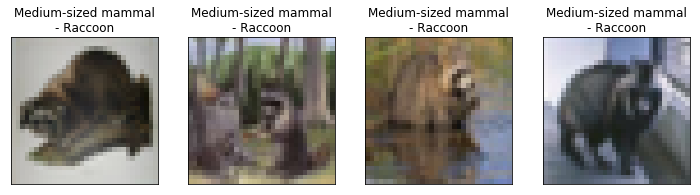

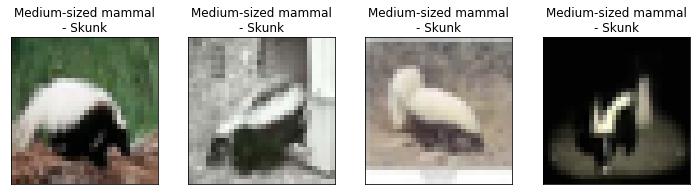

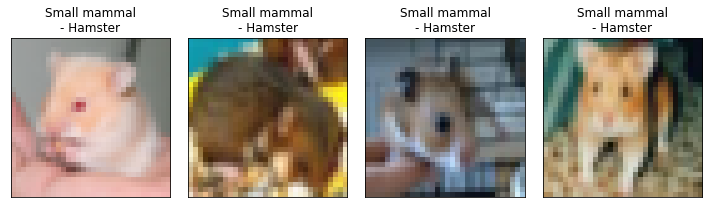

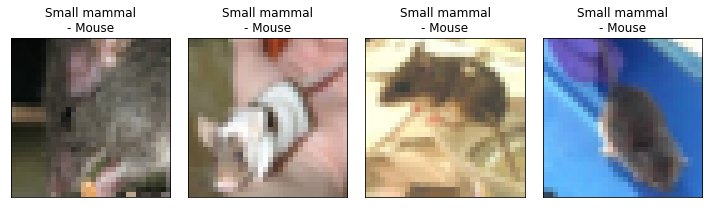

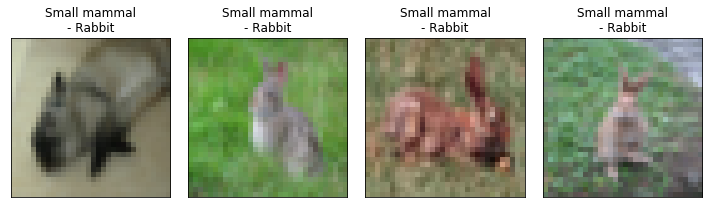

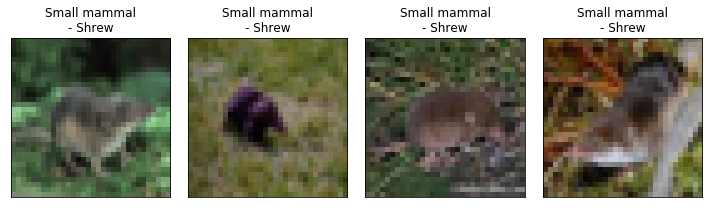

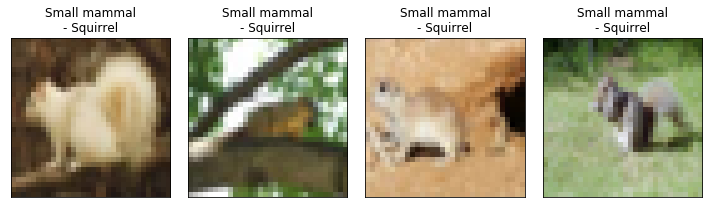

In [0]:
# Use the above function to plot 4 random images from each sub-class
indices = [np.random.choice(range(len(x1)),replace=False) for i in range(4)]; cifar_grid0(x1,y1,34,indices,4)
indices = [np.random.choice(range(len(x2)),replace=False) for i in range(4)]; cifar_grid0(x2,y2,63,indices,4)
indices = [np.random.choice(range(len(x3)),replace=False) for i in range(4)]; cifar_grid0(x3,y3,64,indices,4)
indices = [np.random.choice(range(len(x4)),replace=False) for i in range(4)]; cifar_grid0(x4,y4,66,indices,4)
indices = [np.random.choice(range(len(x5)),replace=False) for i in range(4)]; cifar_grid0(x5,y5,75,indices,4)
indices = [np.random.choice(range(len(x6)),replace=False) for i in range(4)]; cifar_grid0(x6,y6,36,indices,4)
indices = [np.random.choice(range(len(x7)),replace=False) for i in range(4)]; cifar_grid0(x7,y7,50,indices,4)
indices = [np.random.choice(range(len(x8)),replace=False) for i in range(4)]; cifar_grid0(x8,y8,65,indices,4)
indices = [np.random.choice(range(len(x9)),replace=False) for i in range(4)]; cifar_grid0(x9,y9,74,indices,4)
indices = [np.random.choice(range(len(x10)),replace=False) for i in range(4)]; cifar_grid0(x10,y10,80,indices,4)

## Looping for 25 trials

In [0]:
medium_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'] 
small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']

i=0; x_train_data, y_train_data, x_test_data, y_test_data = [],[],[],[];
for j in medium_mammals:
  for k in small_mammals:
      # For testing data - 
      medium_index_ts = [fine_label.index(j)]
      small_index_ts = [fine_label.index(k)]
      target_index_ts = medium_index_ts + small_index_ts
            
      # For training set
      medium_index_tr = [ fine_label.index(x) for x in medium_mammals if x not in j ]
      small_index_tr = [ fine_label.index(x) for x in small_mammals if x not in k ]
      target_index_tr = medium_index_tr + small_index_tr

      print ("\nTrial",i," -> Training set ->","Index of Medium mammals:", medium_index_tr,";\tIndex of Small mammals:", small_index_tr)
      print ("\t -> Testing set ->","Index of Medium mammals:", medium_index_ts,";\tIndex of Small mammals:", small_index_ts)
            
      # Splice the dataset to extract the relevant portion of data
      train_slice_2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index_tr])
      y_train_2 = y[train_slice_2]
      x_train_2 = x[train_slice_2] 
      
      # Test set
      test_slice_2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index_ts])
      y_test_2 = y[test_slice_2]
      x_test_2 = x[test_slice_2]
      
      unique_ts, counts_ts = np.unique(y_test_2, return_counts=True)             # Numpy method to count the number of time a certain number occurs
      unique_tr, counts_tr = np.unique(y_train_2, return_counts=True)  
           
      print ("Complete Training set:", np.unique(y_train_2), "with count",dict(zip(unique_tr, counts_tr)), \
             "\nComplete Testing set:", np.unique(y_test_2),"with count", dict(zip(unique_ts, counts_ts)))
      
      # For further utilization, append training and testing values into a list
      y_train_data.append(y_train_2)
      x_train_data.append(x_train_2)
      y_test_data.append(y_test_2)
      x_test_data.append(x_test_2)
      
      # To print trial numbers; we could also start numbering from 1 
      i=i+1


Trial 0  -> Training set -> Index of Medium mammals: [63, 64, 66, 75] ;	Index of Small mammals: [50, 65, 74, 80]
	 -> Testing set -> Index of Medium mammals: [34] ;	Index of Small mammals: [36]
Complete Training set: [50 63 64 65 66 74 75 80] with count {50: 600, 63: 600, 64: 600, 65: 600, 66: 600, 74: 600, 75: 600, 80: 600} 
Complete Testing set: [34 36] with count {34: 600, 36: 600}

Trial 1  -> Training set -> Index of Medium mammals: [63, 64, 66, 75] ;	Index of Small mammals: [36, 65, 74, 80]
	 -> Testing set -> Index of Medium mammals: [34] ;	Index of Small mammals: [50]
Complete Training set: [36 63 64 65 66 74 75 80] with count {36: 600, 63: 600, 64: 600, 65: 600, 66: 600, 74: 600, 75: 600, 80: 600} 
Complete Testing set: [34 50] with count {34: 600, 50: 600}

Trial 2  -> Training set -> Index of Medium mammals: [63, 64, 66, 75] ;	Index of Small mammals: [36, 50, 74, 80]
	 -> Testing set -> Index of Medium mammals: [34] ;	Index of Small mammals: [65]
Complete Training set: [36 

In [0]:
# Let us view the values stored
for i in range(0,25):
  print("Trial",i, "->\t Testing set:",  np.unique(y_test_data[i]),"with shape", y_test_data[i].shape,"\t Training set:", np.unique(y_train_data[i]), \
        "with shape", y_train_data[i].shape)

Trial 0 ->	 Testing set: [34 36] with shape (1200, 1) 	 Training set: [50 63 64 65 66 74 75 80] with shape (4800, 1)
Trial 1 ->	 Testing set: [34 50] with shape (1200, 1) 	 Training set: [36 63 64 65 66 74 75 80] with shape (4800, 1)
Trial 2 ->	 Testing set: [34 65] with shape (1200, 1) 	 Training set: [36 50 63 64 66 74 75 80] with shape (4800, 1)
Trial 3 ->	 Testing set: [34 74] with shape (1200, 1) 	 Training set: [36 50 63 64 65 66 75 80] with shape (4800, 1)
Trial 4 ->	 Testing set: [34 80] with shape (1200, 1) 	 Training set: [36 50 63 64 65 66 74 75] with shape (4800, 1)
Trial 5 ->	 Testing set: [36 63] with shape (1200, 1) 	 Training set: [34 50 64 65 66 74 75 80] with shape (4800, 1)
Trial 6 ->	 Testing set: [50 63] with shape (1200, 1) 	 Training set: [34 36 64 65 66 74 75 80] with shape (4800, 1)
Trial 7 ->	 Testing set: [63 65] with shape (1200, 1) 	 Training set: [34 36 50 64 66 74 75 80] with shape (4800, 1)
Trial 8 ->	 Testing set: [63 74] with shape (1200, 1) 	 Training

In [0]:
# For all trials, convert class vectors to binary class matrices.
y_train_c, y_test_c, x_train,x_test =[],[],[],[]

for i in range(0,25):
  y_train_cat = to_categorical(y_train_data[i], num_classes)
  y_test_cat = to_categorical(y_test_data[i], num_classes)
  y_train_c.append(y_train_cat)
  y_test_c.append(y_test_cat)

  # Normalize data
  x_train_norm = x_train_data[i].astype('float32')
  x_test_norm = x_test_data[i].astype('float32')
  x_train_norm /= 255.0    
  x_test_norm /= 255.0
  x_train.append(x_train_norm)
  x_test.append(x_test_norm)

In [0]:
# Binary as we are working with two superclasses labels (or coarse labels)
y_train_bin, y_test_bin =[],[]
for i in range(0,25):
  y_train_binary = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_train2 ])
  y_test_binary = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_test2 ])
  
  # Obtain count along with the unique values
  unique_tr, counts_tr = np.unique(y_train_binary, return_counts=True)  
  unique_ts, counts_ts = np.unique(y_test_binary, return_counts=True)  
  print('Trial',i,'-> \tBinary y train\'s shape:', y_train_binary.shape,'and count:',dict(zip(unique_tr, counts_tr)),\
        '\t\tBinary y test\'s shape:',y_test_binary.shape, "and count:", dict(zip(unique_ts, counts_ts))) #builds a dictionary that shows that count
  
  # Append values for future use
  y_train_bin.append(y_train_binary)
  y_test_bin.append(y_test_binary)

Trial 0 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 1 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 2 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 3 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 4 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 5 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 6 -> 	Binary y train's shape: (4800, 1) and count: {0: 2400, 1: 2400} 		Binary y test's shape: (1200, 1) and count: {0: 600, 1: 600}
Trial 7 -> 	Binary y train'

# **Machine Learning Algorithms(Dandan Zhao and CHING-MIN HU)**

In [0]:
import time
#Let's see how good is RandomForest
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score

# reshape
x_train2 = x_train.reshape(x_train.shape[0],3*32*32)
x_test2 = x_test.reshape(x_test.shape[0],3*32*32)
print(x_train2.shape)
print(x_test2.shape)

(4800, 3072)
(1200, 3072)


In [0]:
def cifar_grid1(X,Y,inds,n_col,predictions,test_list):
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(15, 20))
  #count=0
  #l=list()
# align labels in the right order  #encode the target class
  clabels = ['small_mammals','medium_sized_mammal']
  #print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
     
      if i_inds < N:
        rgb = X[[i_data,...]]
        test_label=test_list[0] if clabels[Y[i_data][0]]=='small_mammals' else test_list[1] #######
        label =clabels[Y[i_data][0]]
        
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1)
        #pred = clabels[np.argmax(predictions[i_data,...])]
        pred = clabels[predictions[i_data]]
        plt.imshow(img, interpolation='nearest')
        #plt.title("actual: {}\n predict: {}".format(label,pred))
        plt.title("actual: {}({})\n predict: {}".format(label,test_label,pred))
        #if label==pred:
        #  count+=1
        #  l.append(j*4+k)
  #print(count)
  #print(l)
         
  fig.set_tight_layout(True)

In [0]:
def train_test(small,medium): # test class for small and med
  small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
  small_mammals.remove(small)
  medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
  medium_sized_mammals.remove(medium)
  
  # For training set
  medium_ind = [ fine_label.index(x) for x in medium_sized_mammals ]
  small_ind = [ fine_label.index(x) for x in small_mammals ]
  target_ind = medium_ind + small_ind

  #print ("Training set-\nNew index of Medium-sized mammals:", medium_ind,"\nNew index of Small mammals:", small_ind)

  # For testing data - 
  medium_ind_2 = [ fine_label.index(x) for x in [medium] ]
  small_ind_2 = [ fine_label.index(x) for x in [small] ]
  target_ind_2 = medium_ind_2 + small_ind_2
  #print ("\nTesting set-\nNew index of Medium-sized mammals:", medium_ind_2,"\nNew index of Small mammals:", small_ind_2)
  
  # Splice the dataset to extract the relevant portion of data
  train_slice3 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_ind])
  y_train3 = y[train_slice3]
  x_train3 = x[train_slice3]

  # Test set
  test_slice3 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_ind_2])
  y_test3 = y[test_slice3]
  x_test3 = x[test_slice3]

  #print ("Training set:", np.unique(y_train3))
  #print ("\nTesting set:", np.unique(y_test3))
  #  Binary as we are working with two superclasses labels (or coarse labels)
  y_train_bin3 = np.array([[int(y[0] in medium_ind)] for y in y_train3])
  y_test_bin3 = np.array([[int(y[0] in medium_ind_2)] for y in y_test3])
  y_bin3 = np.concatenate((y_train_bin3,y_test_bin3)) # for two superclass
  
  return x_train3,x_test3,y_train_bin3,y_test_bin3

In [0]:
# create list for train and test
small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
x_train3=list()
x_test3=list()
y_train_bin3=list()
y_test_bin3=list()
test_list=list()  
for i in range(0,5):
  for j in range(0,5):
    small=small_mammals[i]
    medium=medium_sized_mammals[j]
    x_train_temp,x_test_temp,y_train_temp,y_test_temp=train_test(small,medium)
    x_train3.append(x_train_temp)
    x_test3.append(x_test_temp)
    y_train_bin3.append(y_train_temp)
    y_test_bin3.append(y_test_temp)
    test_list.append([small,medium])  


In [0]:
x_train3_ = [x_train3[i].reshape(x_train3[i].shape[0],3*32*32) for i in range(0,25)]
x_test3_ = [x_test3[i].reshape(x_test3[i].shape[0],3*32*32) for i in range(0,25)]
#len(x_train3_)

# **Random Forest**

In [0]:
# find the baseline performance for the random Forest
start = time.time()
logit = RandomForestClassifier()
logit.fit(x_train2, y_train_bin)
logit_pred=logit.predict(x_test2)
scores = cross_val_score(logit, x_train2,y_train_bin, cv=5)
print(scores)
print ("RandomForest Accuracy: {}%".format(logit.score(x_test2, y_test_bin)*100))
end = time.time()
print(end - start)

[0.63541667 0.6625     0.65104167 0.65729167 0.6375    ]
RandomForest Accuracy: 48.333333333333336%
12.922318458557129


In [0]:
# find the best parameters by using GridSearch
#first trail: n_estimators = 10, max_depth = 10, score = 48%
#second trail: 'n_estimators':[50,80,100], 'max_depth':[10,15,18], result : 'max_depth': 15, 'n_estimators': 80 score = 48.50%
# third trail: 'n_estimators':[200,500], 'max_depth':[15,18], result :'max_depth': 18, 'n_estimators': 500, score = 47.25%
# fourth trail: 'n_estimators':[80], 'max_depth':[18,25], result: 'max_depth': 18, 'n_estimators': 80, score = 47.75%

# best parameters
tuned_parameters = {'n_estimators':[80], 'max_depth':[15]}

In [0]:
%%time
logit = GridSearchCV(RandomForestClassifier(), tuned_parameters, n_jobs = -1, cv=5, verbose=0)
logit.fit(x_train2,y_train_bin)

CPU times: user 19.8 s, sys: 183 ms, total: 19.9 s
Wall time: 1min 29s


In [0]:
print("Best parameters set found on development set:")
print()
print(logit.best_params_)
print()
print("Grid scores on development set:")
print()
means = logit.cv_results_['mean_test_score']
stds = logit.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, logit.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 15, 'n_estimators': 80}

Grid scores on development set:

0.699 (+/-0.036) for {'max_depth': 15, 'n_estimators': 80}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (logit.best_estimator_.score(x_test2,y_test_bin)*100))

prediction score on testing data with the best estimator: 47.08%


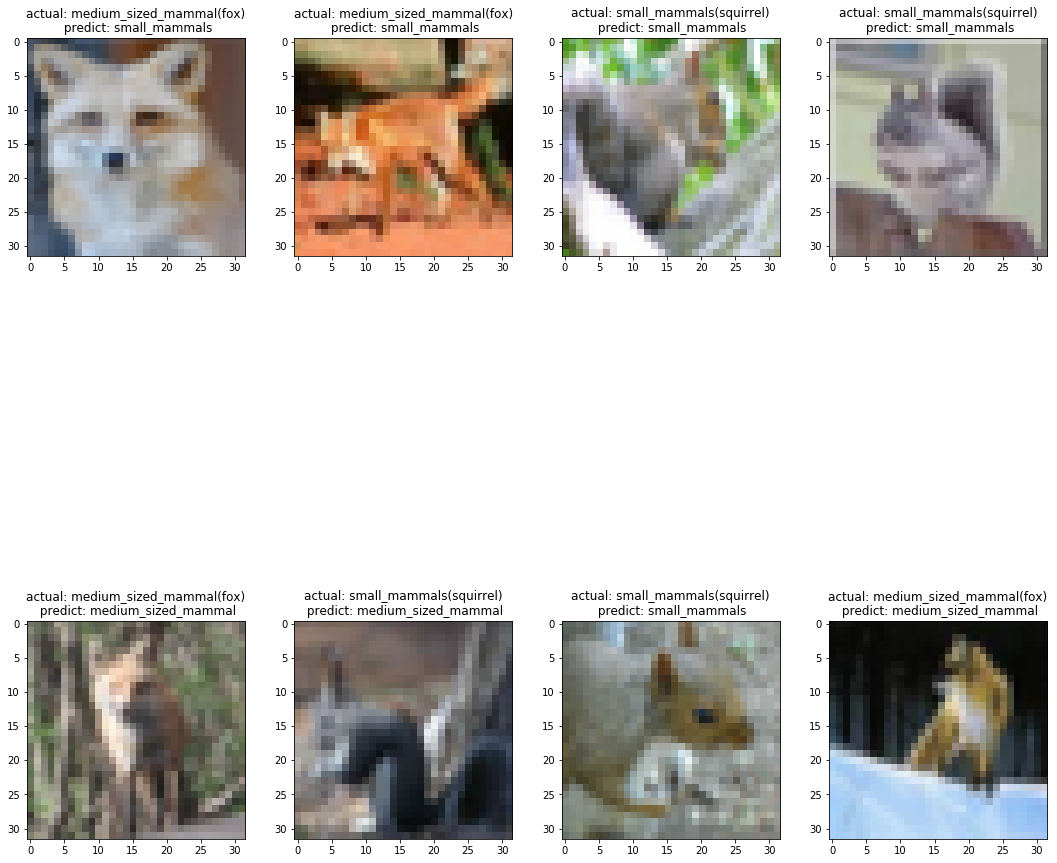

In [0]:
test_label = ['squirrel','fox']
logit_pred=logit.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(8)]
#cifar_grid(x_test2, y_test_bin2, indices,4,logit_pred)
cifar_grid1(x_test2, y_test_bin, indices,4,logit_pred,test_label)

In [0]:
print(confusion_matrix(y_test_bin, logit_pred, labels=None, sample_weight=None))

[[334 266]
 [369 231]]


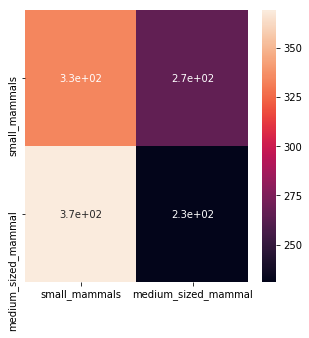

In [0]:
cm=confusion_matrix(y_test_bin, logit_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print (classification_report(y_test_bin, logit_pred))

              precision    recall  f1-score   support

           0       0.48      0.56      0.51       600
           1       0.46      0.39      0.42       600

   micro avg       0.47      0.47      0.47      1200
   macro avg       0.47      0.47      0.47      1200
weighted avg       0.47      0.47      0.47      1200



# **Extra Decision Tree**

In [0]:
# find the baseline performance
start = time.time()
Extratree = ExtraTreesClassifier()
Extratree.fit(x_train2,y_train_bin)
Extratree_pred=Extratree.predict(x_test2)
scores = cross_val_score(Extratree, x_train2, y_train_bin, cv=5)
print(scores)
print ("ExtraTree Accuracy: {}%".format(Extratree.score(x_test2, y_test_bin)*100))
end = time.time()
print(end - start)

[0.64583333 0.69479167 0.653125   0.67708333 0.628125  ]
ExtraTree Accuracy: 47.833333333333336%
5.833073377609253


In [0]:
# find the best parameters by using GridSearch
# first trail: 'n_estimators':range(50,200,40), 'max_depth':[10, 15, 20], result:'max_depth': 15, 'n_estimators': 170, score: 48.25%
# second trail: 'n_estimators':[300, 500, 1000], 'max_depth':[15,18],result :'max_depth': 18, 'n_estimators': 1000, score: 47.58%
# final trail:'n_estimators':[170,180], 'max_depth':[15,18], result:'max_depth': 15, 'n_estimators': 180, score:48.50%

# best parameter:'max_depth': 15, 'n_estimators': 180, score:48.50%
tuned_parameters = {'n_estimators':[170,180], 'max_depth':[15,18]}

In [0]:
%%time
Extratree = GridSearchCV(ExtraTreesClassifier(), tuned_parameters, cv=5, verbose=0)
Extratree.fit(x_train2, y_train_bin)

CPU times: user 4min 27s, sys: 128 ms, total: 4min 27s
Wall time: 4min 27s


In [0]:
print("Best parameters set found on development set:")
print()
print(Extratree.best_params_)
print()
print("Grid scores on development set:")
print()
means = Extratree.cv_results_['mean_test_score']
stds = Extratree.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, Extratree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 15, 'n_estimators': 170}

Grid scores on development set:

0.713 (+/-0.030) for {'max_depth': 15, 'n_estimators': 170}
0.709 (+/-0.025) for {'max_depth': 15, 'n_estimators': 180}
0.713 (+/-0.039) for {'max_depth': 18, 'n_estimators': 170}
0.711 (+/-0.016) for {'max_depth': 18, 'n_estimators': 180}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (Extratree.best_estimator_.score(x_test2,y_test_bin)*100))

prediction score on testing data with the best estimator: 47.00%


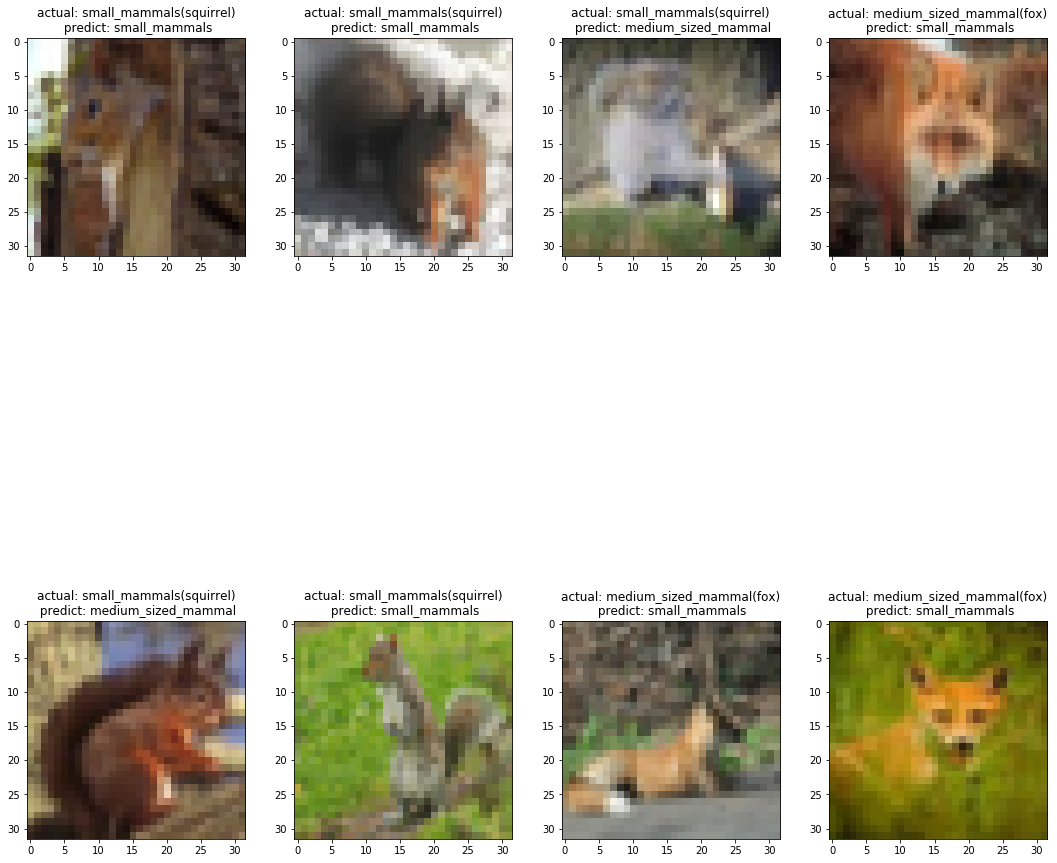

In [0]:
test_label = ['squirrel','fox']

Extratree_pred=Extratree.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(8)]
cifar_grid1(x_test2, y_test_bin, indices,4,Extratree_pred,test_label)

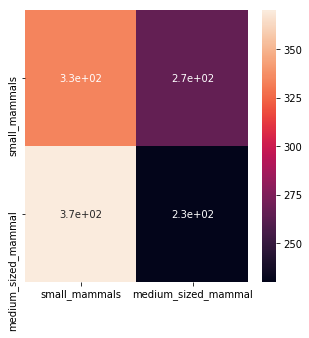

In [0]:
confusion_matrix(y_test_bin, Extratree_pred, labels=None, sample_weight=None)

cm=confusion_matrix(y_test_bin, Extratree_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print (classification_report(y_test_bin, Extratree_pred))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51       600
           1       0.46      0.38      0.42       600

   micro avg       0.47      0.47      0.47      1200
   macro avg       0.47      0.47      0.47      1200
weighted avg       0.47      0.47      0.47      1200



# **Gradient Boosting Algortihms**

In [0]:
# baseline performance
start = time.time()
Gradient = GradientBoostingClassifier()
Gradient.fit(x_train2, y_train_bin)
Gradient_pred=Gradient.predict(x_test2)
scores = cross_val_score(Gradient, x_train2, y_train_bin, cv=5)
print ("Gradient Boosting Accuracy: {}%".format(Gradient.score(x_test2, y_test_bin)*100))
end = time.time()
print(end - start)

Gradient Boosting Accuracy: 41.083333333333336%
754.4215087890625


In [0]:
# first trail:'n_estimators':[10,20], 'max_depth':[10],'learning_rate':[0.1],  result: 'n_estimators': 20 score: 47%
#second:'n_estimators':[30,50], 'max_depth':[10],'learning_rate':[0.2] ,result:'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50, score = 45.92
#third: result: 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 20,score: 45.08%
# best: 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20 score: 47%

tuned_parameters = {'n_estimators':[20], 'max_depth':[5,10],'learning_rate':[0.1]}

In [0]:
%%time
Gradient = GridSearchCV(GradientBoostingClassifier( subsample=0.8,max_features='sqrt', min_samples_leaf = 10, random_state=10), tuned_parameters, cv=5, verbose=0)
Gradient.fit(x_train2, y_train_bin)

CPU times: user 35.1 s, sys: 22.5 ms, total: 35.2 s
Wall time: 35.2 s


In [0]:
print("Best parameters set found on development set:")
print()
print(Gradient.best_params_)
print()
print("Grid scores on development set:")
print()
means = Gradient.cv_results_['mean_test_score']
stds = Gradient.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, Gradient.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}

Grid scores on development set:

0.691 (+/-0.026) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
0.695 (+/-0.027) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (Gradient.best_estimator_.score(x_test2,y_test_bin)*100))

prediction score on testing data with the best estimator: 47.00%


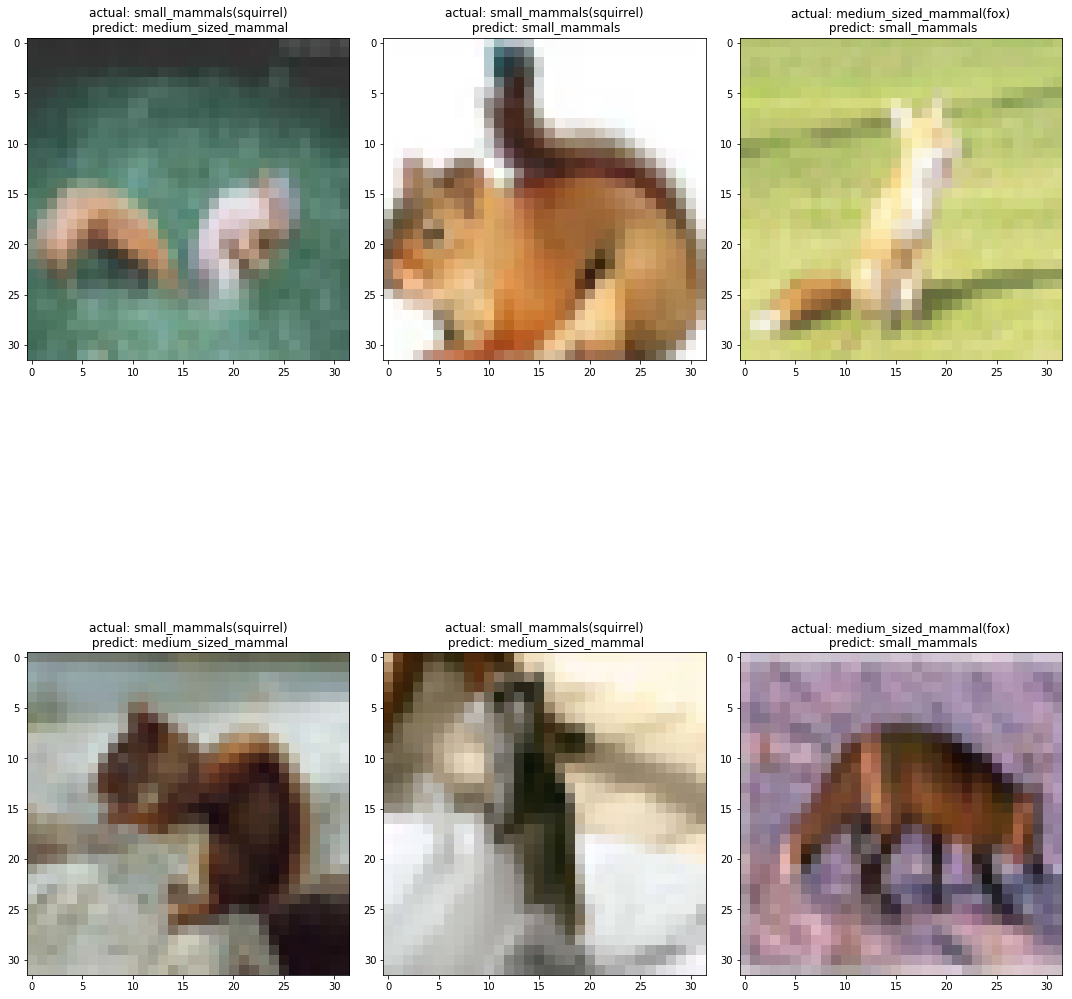

In [0]:
test_label = ['squirrel','fox']
Gradient_pred=Gradient.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(6)]
cifar_grid1(x_test2, y_test_bin,indices,3,Gradient_pred,test_label)

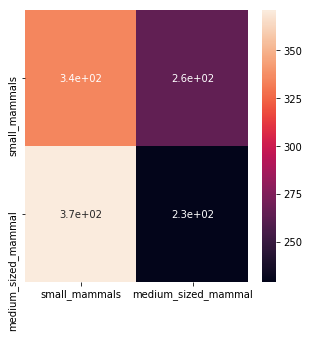

In [0]:
confusion_matrix(y_test_bin, Gradient_pred, labels=None, sample_weight=None)
cm=confusion_matrix(y_test_bin, Gradient_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin, Gradient_pred))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51       600
           1       0.46      0.38      0.42       600

   micro avg       0.47      0.47      0.47      1200
   macro avg       0.47      0.47      0.47      1200
weighted avg       0.47      0.47      0.47      1200



# **SVM with"rbf"kernel**

In [0]:
start = time.time()
rbf = SVC(kernel='rbf')
rbf.fit(x_train2, y_train_bin)
rbf_pred=rbf.predict(x_test2)
print ("SVM - rbf Accuracy: {}%".format(rbf.score(x_test2, y_test_bin)*100))
end = time.time()
print('{} seconds'.format(end - start))

SVM - rbf Accuracy: 44.5%
157.61715364456177 seconds


In [0]:
# 'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1,10,100]
# 'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [200,500,1000]
# 'kernel': ['rbf'], 'gamma': [1e-1, 1e-2], 'C': [1,10,100]
# 'kernel': ['rbf'], 'gamma': [1e-1, 1e-2], 'C': [200,500,1000]
# 'kernel': ['rbf'], 'gamma': [1, 5], 'C': [1,10,100]
# 'kernel': ['rbf'], 'gamma': [1, 5], 'C': [200,500,1000]
# best:'C' : 1, 'gamma' : 0.01, 'kernel' : 'rbf' 
tuned_parameters = {'kernel': ['rbf'],
                    'gamma': [1e-2],
                     'C': [1,10]}

In [0]:
%%time
rbf_clf = GridSearchCV(SVC(), tuned_parameters, cv=5, verbose=0)
rbf_clf.fit(x_train2, y_train_bin)

CPU times: user 28min 34s, sys: 425 ms, total: 28min 35s
Wall time: 28min 35s


In [0]:
print("Best parameters set found on development set:")
print()
print(rbf_clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = rbf_clf.cv_results_['mean_test_score']
stds = rbf_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rbf_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.717 (+/-0.012) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.708 (+/-0.020) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (rbf_clf.best_estimator_.score(x_test2,y_test_bin)*100))

prediction score on testing data with the best estimator: 42.50%


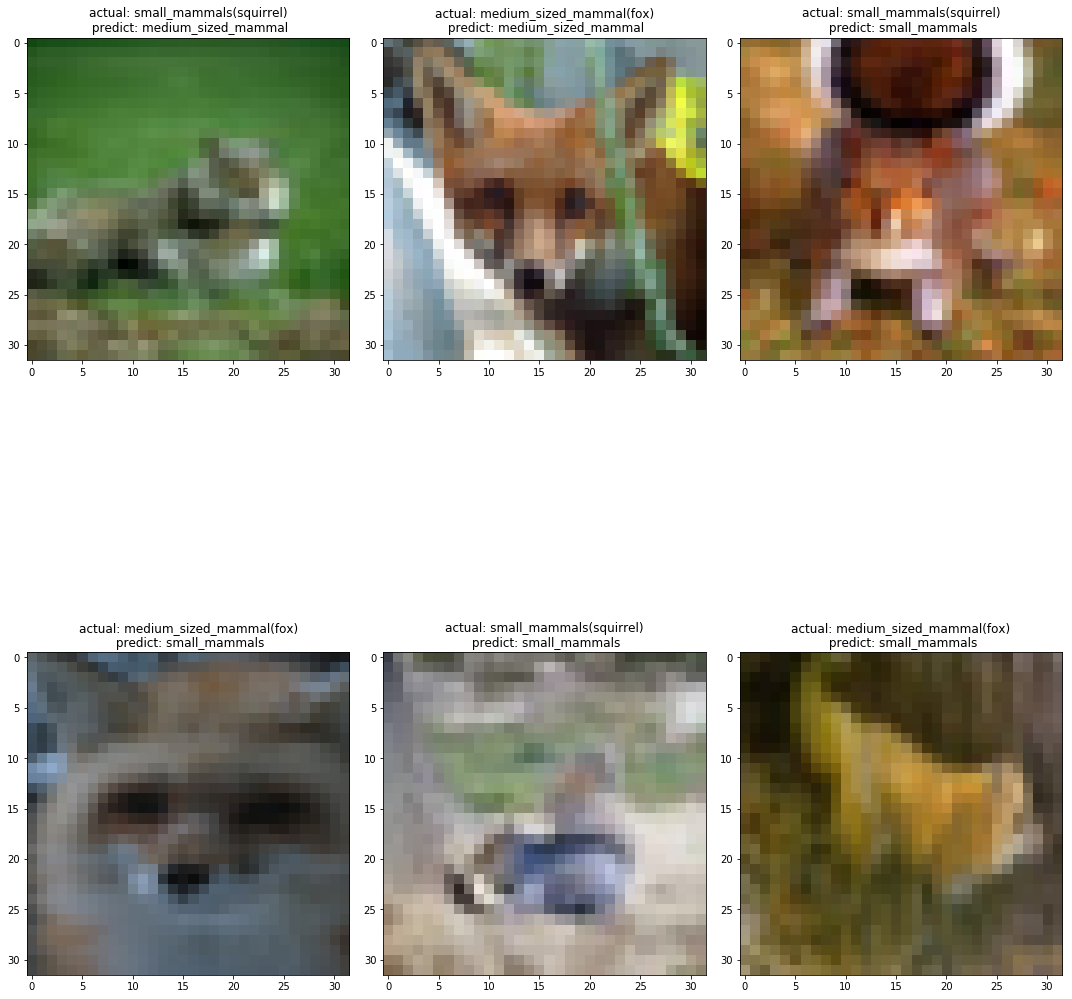

In [0]:
test_label = ['squirrel','fox']
rbf_clf_pred=rbf_clf.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(6)]
cifar_grid1(x_test2, y_test_bin,indices,3,rbf_clf_pred,test_label)

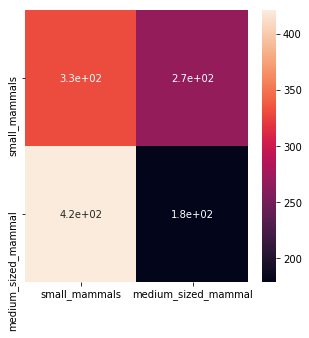

In [0]:
confusion_matrix(y_test_bin, rbf_clf_pred, labels=None, sample_weight=None)
cm=confusion_matrix(y_test_bin, rbf_clf_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin, rbf_clf_pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49       600
           1       0.40      0.30      0.34       600

   micro avg       0.42      0.42      0.42      1200
   macro avg       0.42      0.42      0.42      1200
weighted avg       0.42      0.42      0.42      1200



# **logistic regression**

In [0]:
start = time.time()
lr = LogisticRegression()
lr.fit(x_train2, y_train_bin)
lr_pred=lr.predict(x_test2)
print ("Logistic Regression Accuracy: {}%".format(lr.score(x_test2, y_test_bin)*100))
end = time.time()
print('{} seconds'.format(end - start))

Logistic Regression Accuracy: 39.75%
45.831730365753174 seconds


In [0]:
# 'penalty' : ['l1', 'l2'], 'C': [1,10,100]
# 'penalty' : ['l1', 'l2'], 'C': [20,50]
# 'penalty' : ['l1', 'l2'], 'C': [20,500]
# 'penalty' : ['l1', 'l2'], 'C': [1,10,100,500], solver : ['saga']
# 'C': [1,10,100], 'solver': [ 'newton-cg', 'sag' ,'lbfgs']
# 'C': 100, 'penalty': 'l2'
# best:
tuned_parameters = { 'penalty' : ['l2'],
                     'C': [100]}

In [0]:
%%time
lr_clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5, verbose=0)
lr_clf.fit(x_train2, y_train_bin)

CPU times: user 22min 42s, sys: 1.05 s, total: 22min 43s
Wall time: 22min 43s


In [0]:
print("Best parameters set found on development set:")
print()
print(lr_clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = lr_clf.cv_results_['mean_test_score']
stds = lr_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lr_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'C': 100, 'penalty': 'l2'}

Grid scores on development set:

0.601 (+/-0.031) for {'C': 100, 'penalty': 'l2'}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (lr_clf.best_estimator_.score(x_test2, y_test_bin)*100))

prediction score on testing data with the best estimator: 44.75%


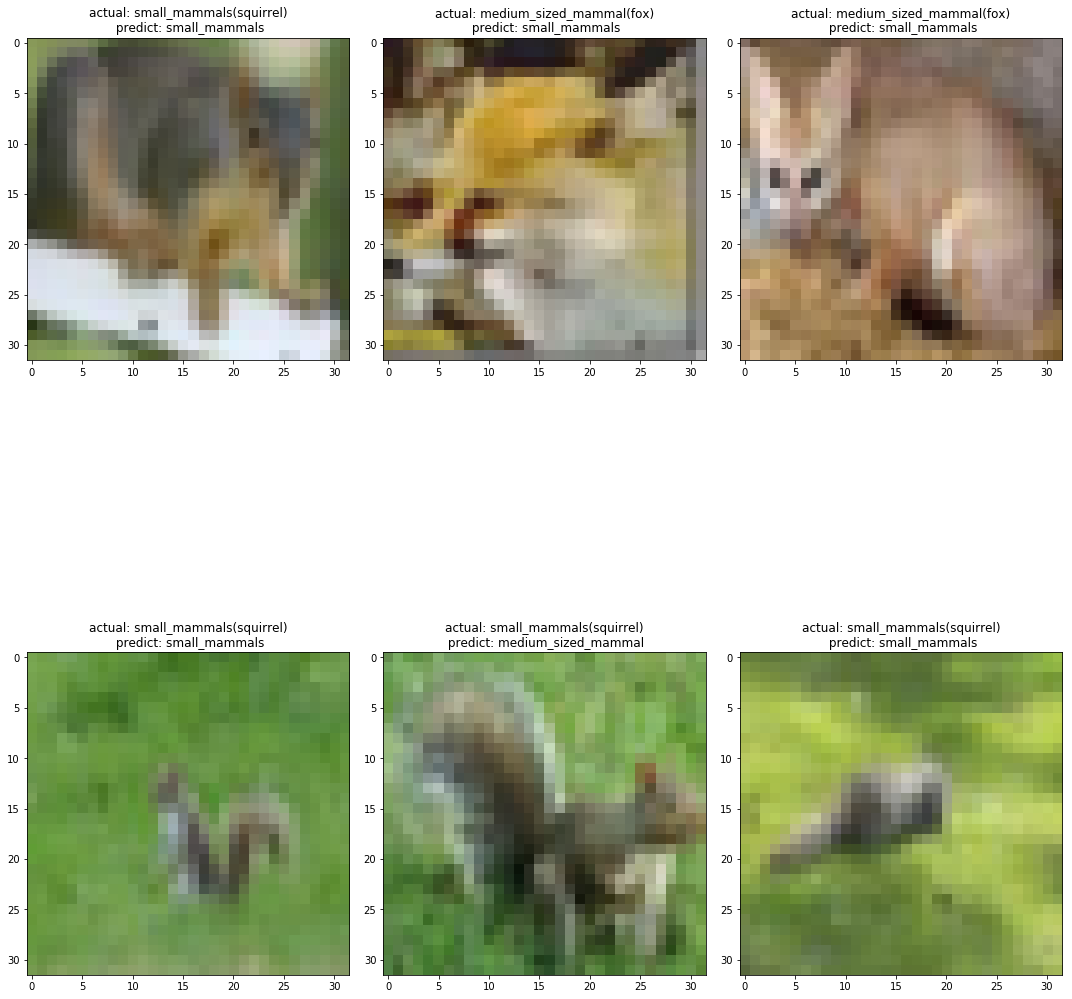

In [0]:
test_label = ['squirrel','fox']
lr_clf_pred=rbf_clf.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(6)]
cifar_grid1(x_test2, y_test_bin,indices,3,lr_clf_pred,test_label)

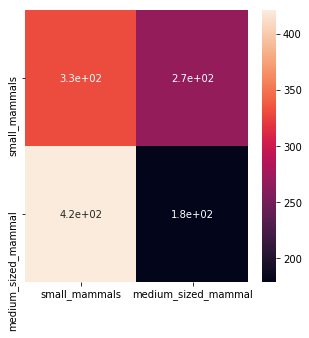

In [0]:
confusion_matrix(y_test_bin, lr_clf_pred, labels=None, sample_weight=None)
cm=confusion_matrix(y_test_bin, lr_clf_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin, lr_clf_pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49       600
           1       0.40      0.30      0.34       600

   micro avg       0.42      0.42      0.42      1200
   macro avg       0.42      0.42      0.42      1200
weighted avg       0.42      0.42      0.42      1200



# **Bagging **

In [0]:
start = time.time()
bag = BaggingClassifier()
bag.fit(x_train2, y_train_bin)
#bag_pred=bag.predict(x_test2)
print ("Bagging Accuracy: {}%".format(bag.score(x_test2, y_test_bin)*100))
end = time.time()
print('{} seconds'.format(end - start))

Bagging Accuracy: 48.66666666666667%
108.44793486595154 seconds


In [0]:
# 'n_estimators' : [1,2,3], 'max_samples': [0.001,0.01], 'bootstrap': [True,False]
# 'n_estimators' : [1,2,3], 'max_samples': [0.001,0.01], 'bootstrap': [True,False], 'bootstrap_features': [True,False]
# 'n_estimators' : [4,5,10], 'max_samples': [0.001,0.01], 'bootstrap': [True,False], 'bootstrap_features': [True,False]
# 'n_estimators' : [100,500,1000], 'max_samples': [0.001,0.01], 'bootstrap': [True,False], 'bootstrap_features': [True,False]
# 'n_estimators' : [1,10,100], 'max_samples': [0.1,1], 'bootstrap': [True,False], 'bootstrap_features': [True,False]
# 'n_estimators' : [3], 'max_samples': [0.01], 'bootstrap': [False], 'bootstrap_features': [False], 'n_job' : [2,3,4,5,6,7,8,9,10,20,50,100,200,500,1000]
# best:'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.01, 'n_estimators': 3
tuned_parameters = { 'n_estimators' : [2,3],
                     'max_samples': [0.01],
                   'bootstrap': [False],
                   'bootstrap_features': [False]}

In [0]:
%%time
bag_clf = GridSearchCV(BaggingClassifier(), tuned_parameters, cv=5, verbose=0)
bag_clf.fit(x_train2, y_train_bin)

CPU times: user 10.1 s, sys: 47 ms, total: 10.1 s
Wall time: 10.1 s


In [0]:
print("Best parameters set found on development set:")
print()
print(bag_clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = bag_clf.cv_results_['mean_test_score']
stds = bag_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bag_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.01, 'n_estimators': 3}

Grid scores on development set:

0.541 (+/-0.034) for {'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.01, 'n_estimators': 2}
0.597 (+/-0.040) for {'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.01, 'n_estimators': 3}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (bag_clf.best_estimator_.score(x_test2, y_test_bin)*100))

prediction score on testing data with the best estimator: 45.25%


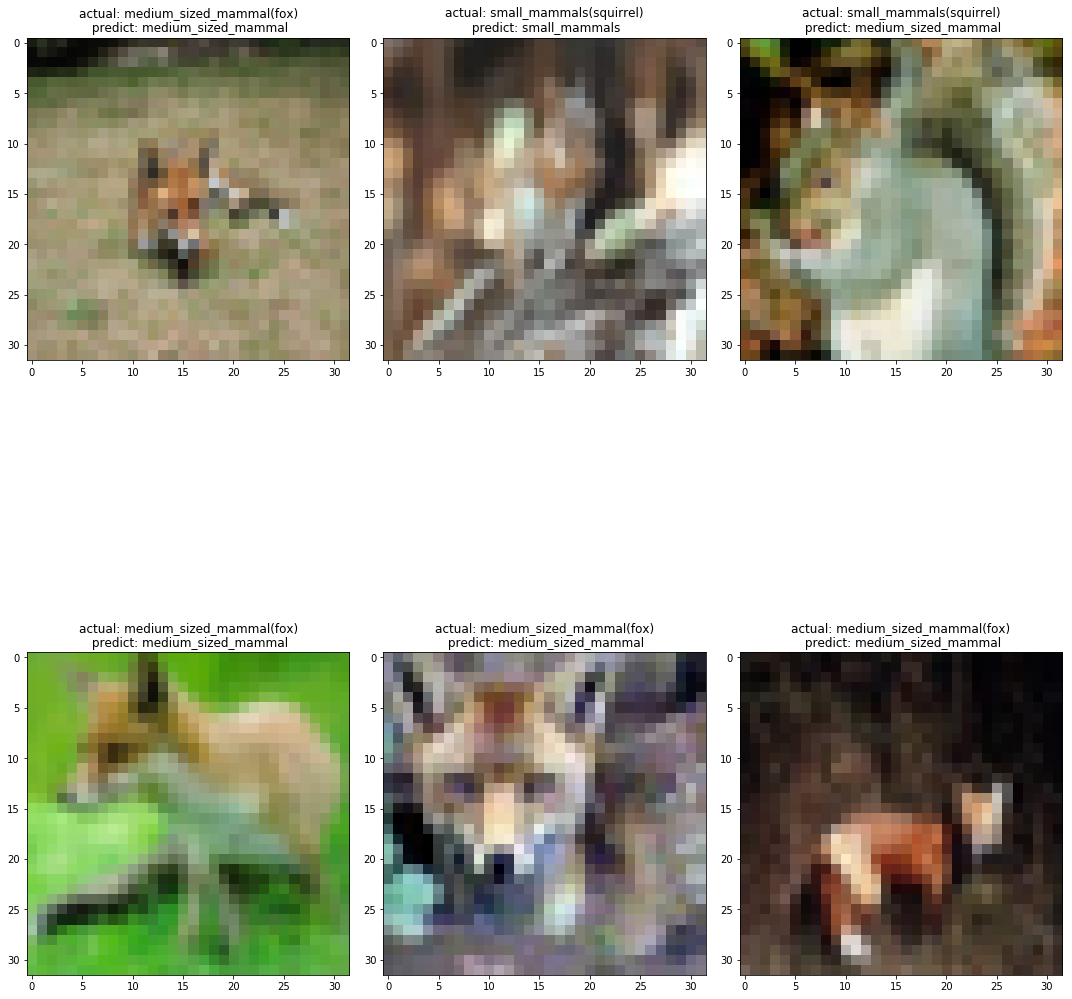

In [0]:
test_label = ['squirrel','fox']
bag_clf_pred=bag_clf.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(6)]
cifar_grid1(x_test2, y_test_bin,indices,3,bag_clf_pred,test_label)

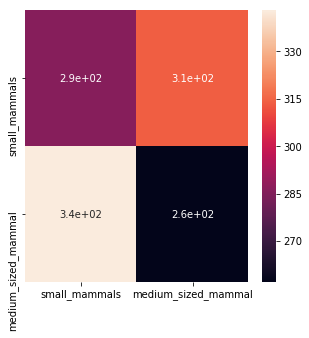

In [0]:
confusion_matrix(y_test_bin, bag_clf_pred, labels=None, sample_weight=None)
cm=confusion_matrix(y_test_bin, bag_clf_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin, bag_clf_pred))

              precision    recall  f1-score   support

           0       0.45      0.48      0.47       600
           1       0.45      0.43      0.44       600

   micro avg       0.45      0.45      0.45      1200
   macro avg       0.45      0.45      0.45      1200
weighted avg       0.45      0.45      0.45      1200



In [0]:
bag_accuracy=list()
bag_time=list()
print("Bagging Classifier ") 
for i in range(0,25):
  start = time.time()
  bag1 = BaggingClassifier(bootstrap = False, bootstrap_features = False, max_samples = 0.01, n_estimators = 3)
  bag1.fit(x_train3_[i], y_train_bin3[i])
  bag1_pred=bag1.predict(x_test3_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list[i][0],test_list[i][1] ,bag1.score(x_test3_[i], y_test_bin3[i])*100)) 
  end = time.time()
  print('{} seconds'.format(end - start))
  bag_accuracy.append(bag1.score(x_test3_[i], y_test_bin3[i]))
  bag_time.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(bag_accuracy)*100))
print("average time: {} seconds".format(np.mean(bag_time)))

Bagging Classifier 
Accuracy (hamster, fox): 56.833333333333336%
0.606715202331543 seconds
Accuracy (hamster, porcupine): 54.333333333333336%
0.6023972034454346 seconds
Accuracy (hamster, possum): 53.25%
0.5834193229675293 seconds
Accuracy (hamster, raccoon): 44.83333333333333%
0.589336633682251 seconds
Accuracy (hamster, skunk): 50.24999999999999%
0.5742764472961426 seconds
Accuracy (mouse, fox): 52.083333333333336%
0.5859224796295166 seconds
Accuracy (mouse, porcupine): 59.333333333333336%
0.6068086624145508 seconds
Accuracy (mouse, possum): 56.75%
0.5800490379333496 seconds
Accuracy (mouse, raccoon): 49.583333333333336%
0.6374344825744629 seconds
Accuracy (mouse, skunk): 51.5%
0.637706995010376 seconds
Accuracy (rabbit, fox): 49.0%
0.6255064010620117 seconds
Accuracy (rabbit, porcupine): 55.166666666666664%
0.6180975437164307 seconds
Accuracy (rabbit, possum): 53.583333333333336%
0.6474134922027588 seconds
Accuracy (rabbit, raccoon): 52.0%
0.6259782314300537 seconds
Accuracy (rabbit

# **K-nearest Neighbors**

In [0]:
start = time.time()
knn = KNeighborsClassifier()
knn.fit(x_train2, y_train_bin)
knn_pred=knn.predict(x_test2)
print ("KNN Accuracy: {}%".format(knn.score(x_test2, y_test_bin)*100))
end = time.time()
print('{} seconds'.format(end - start))

KNN Accuracy: 50.416666666666664%
87.33205938339233 seconds


In [0]:
# 'n_neighbors' : [2,3,4], 'weights': ['uniform','distance']
# 'n_neighbors' : [1,5,6], 'weights': ['uniform','distance']
# 'n_neighbors' : [7,8,9], 'weights': ['uniform','distance']
# 'n_neighbors' : [10,20,50], 'weights': ['uniform','distance']
# 'n_neighbors' : [100,200,500,1000], 'weights': ['uniform','distance']
# 'n_neighbors' : [8], 'weights': ['distance'], 'p' : [1,3]
# best: 'n_neighbors' :8, 'weights': 'distance'
tuned_parameters = { 'n_neighbors' : [8],
                     'weights': ['uniform','distance']}

In [0]:
%%time
knn_clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, verbose=0)
knn_clf.fit(x_train2, y_train_bin)

CPU times: user 20min 54s, sys: 188 ms, total: 20min 55s
Wall time: 20min 55s


In [0]:
print("Best parameters set found on development set:")
print()
print(knn_clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = knn_clf.cv_results_['mean_test_score']
stds = knn_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, knn_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'n_neighbors': 8, 'weights': 'distance'}

Grid scores on development set:

0.618 (+/-0.024) for {'n_neighbors': 8, 'weights': 'uniform'}
0.641 (+/-0.022) for {'n_neighbors': 8, 'weights': 'distance'}


In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (knn_clf.best_estimator_.score(x_test2, y_test_bin)*100))

prediction score on testing data with the best estimator: 50.92%


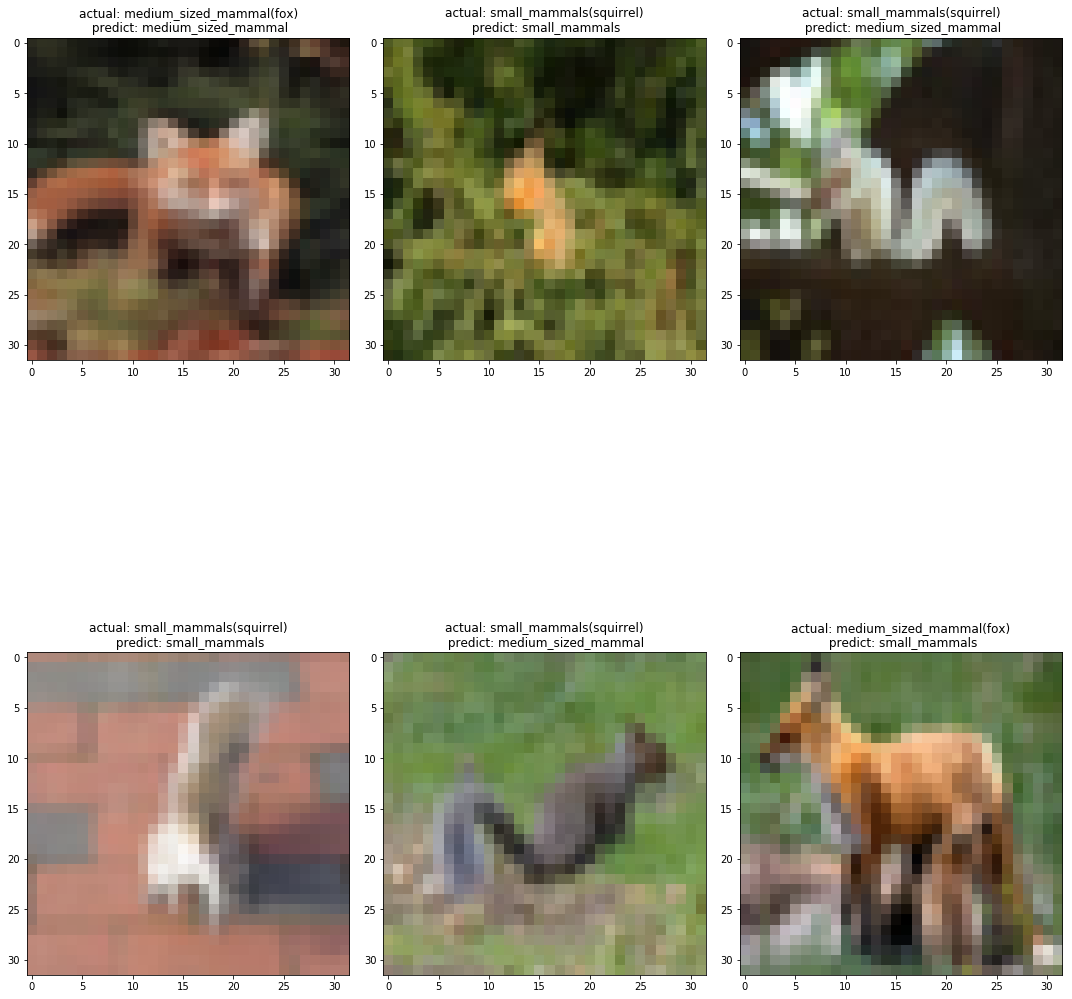

In [0]:
test_label = ['squirrel','fox']
knn_clf_pred=rbf_clf.predict(x_test2)
indices = [np.random.choice(range(len(x_test2))) for j in range(6)]
cifar_grid1(x_test2, y_test_bin,indices,3,knn_clf_pred,test_label)

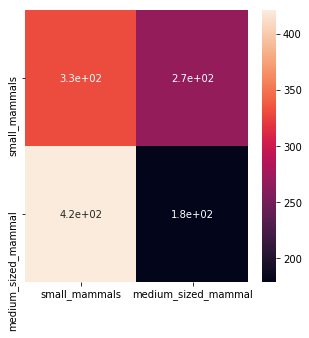

In [0]:
confusion_matrix(y_test_bin, knn_clf_pred, labels=None, sample_weight=None)
cm=confusion_matrix(y_test_bin, knn_clf_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (5,5))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin, knn_clf_pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49       600
           1       0.40      0.30      0.34       600

   micro avg       0.42      0.42      0.42      1200
   macro avg       0.42      0.42      0.42      1200
weighted avg       0.42      0.42      0.42      1200



In [0]:
knn_accuracy=list()
knn_time=list()
print("KNN ") 
for i in range(0,25):
  start = time.time()
  knn1 = KNeighborsClassifier(n_neighbors=8,weights='distance')
  knn1.fit(x_train3_[i], y_train_bin3[i])
  knn1_pred=knn1.predict(x_test3_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list[i][0],test_list[i][1] ,knn1.score(x_test3_[i], y_test_bin3[i])*100)) 
  end = time.time()
  print('{} seconds'.format(end - start))
  knn_accuracy.append(knn1.score(x_test3_[i], y_test_bin3[i]))
  knn_time.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(knn_accuracy)*100))
print("average time: {} seconds".format(np.mean(knn_time)))

KNN 
Accuracy (hamster, fox): 53.583333333333336%
89.06428098678589 seconds
Accuracy (hamster, porcupine): 57.333333333333336%
89.59430837631226 seconds
Accuracy (hamster, possum): 57.833333333333336%
89.55168533325195 seconds
Accuracy (hamster, raccoon): 54.0%
89.87293553352356 seconds
Accuracy (hamster, skunk): 52.916666666666664%
89.32292771339417 seconds
Accuracy (mouse, fox): 49.583333333333336%
88.57954931259155 seconds
Accuracy (mouse, porcupine): 55.58333333333333%
89.04077100753784 seconds
Accuracy (mouse, possum): 56.41666666666667%
88.53943157196045 seconds
Accuracy (mouse, raccoon): 54.333333333333336%
90.76207995414734 seconds
Accuracy (mouse, skunk): 52.33333333333333%
89.74951505661011 seconds
Accuracy (rabbit, fox): 47.75%
90.36008071899414 seconds
Accuracy (rabbit, porcupine): 55.08333333333333%
88.97213244438171 seconds
Accuracy (rabbit, possum): 56.833333333333336%
88.89889621734619 seconds
Accuracy (rabbit, raccoon): 53.583333333333336%
89.81233596801758 seconds
Acc